In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")


print("Path to dataset files:", path)

Path to dataset files: C:\Users\burcz\.cache\kagglehub\datasets\rabieelkharoua\alzheimers-disease-dataset\versions\1


In [12]:
files = os.listdir(path)
print("Content of", files)

csv_file = files[0]
csv_path = os.path.join(path, csv_file)

# Display the content of dataset
data = pd.read_csv(csv_path)

data.head(5)

Content of ['alzheimers_disease_data.csv']


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [7]:
# Divide the dataset into manually 
# selected classes based on feature groups
classes_dict = {
    "Demografic_Details": ["Age", "Gender", "Ethnicity", "EducationLevel"],
    "Lifestyle_Factors": [
        "BMI",
        "Smoking",
        "AlcoholConsumption",
        "PhysicalActivity",
        "DietQuality",
        "SleepQuality",
    ],
    "Medical_History": [
        "FamilyHistoryAlzheimers",
        "CardiovascularDisease",
        "Diabetes",
        "Depression",
        "HeadInjury",
        "Hypertension",
    ],
    "Clinical_Measurements": [
        "SystolicBP",
        "DiastolicBP",
        "CholesterolTotal",
        "CholesterolLDL",
        "CholesterolHDL",
        "CholesterolTriglycerides",
    ],
    "Congnitive_and_Functional_Assements": [
        "MMSE",
        "FunctionalAssessment",
        "MemoryComplaints",
        "BehavioralProblems",
        "ADL",
    ],
    "Symptoms": [
        "Confusion",
        "Disorientation",
        "PersonalityChanges",
        "DifficultyCompletingTasks",
        "Forgetfulness",
    ],
}

diagnosis = data["Diagnosis"]

class_data = {cls_name: data[params] for cls_name, params in classes_dict.items()}
print("Classes of parameters:\n")
for cls_name, _ in class_data.items():
    print(cls_name)

Classes of parameters:

Demografic_Details
Lifestyle_Factors
Medical_History
Clinical_Measurements
Congnitive_and_Functional_Assements
Symptoms


In [13]:
# Plot histograms to visualize
# the shape of data for each selected class
# for cls_name, cls_data in class_data.items():
#     cls_data.hist(figsize=(10, 8))
#     plt.suptitle(f"Histograms for class {cls_name}")
# plt.tight_layout()
# plt.show()

In [14]:
# Plot a histogram to visualize
# the distribution of the 'Diagnosed"
# diagnosis.hist(figsize=(10, 8))
# plt.suptitle(f"Histogram for Diagnosed")
# plt.show()

Feature scales and distributions:

Statistics for SystolicBP:
Mean: 134.26
Median: 134.00
Standard Deviation: 25.95
Min: 90.00, Max: 179.00
Range: 89.00
Skewness: 0.01


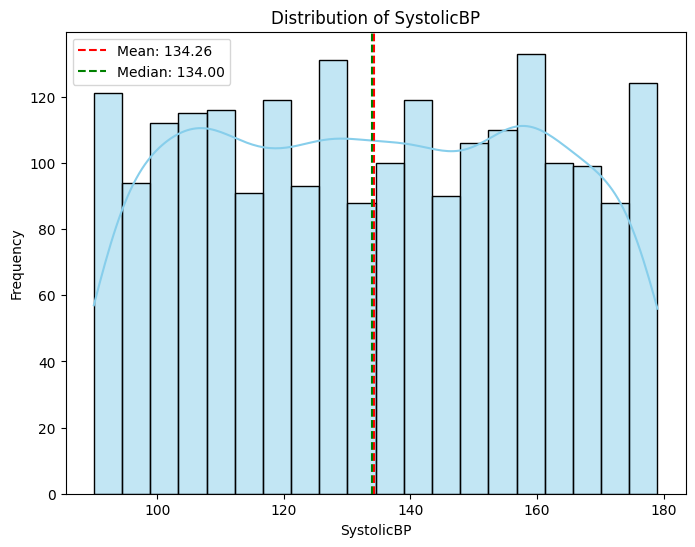


Statistics for DiastolicBP:
Mean: 89.85
Median: 91.00
Standard Deviation: 17.59
Min: 60.00, Max: 119.00
Range: 59.00
Skewness: -0.05


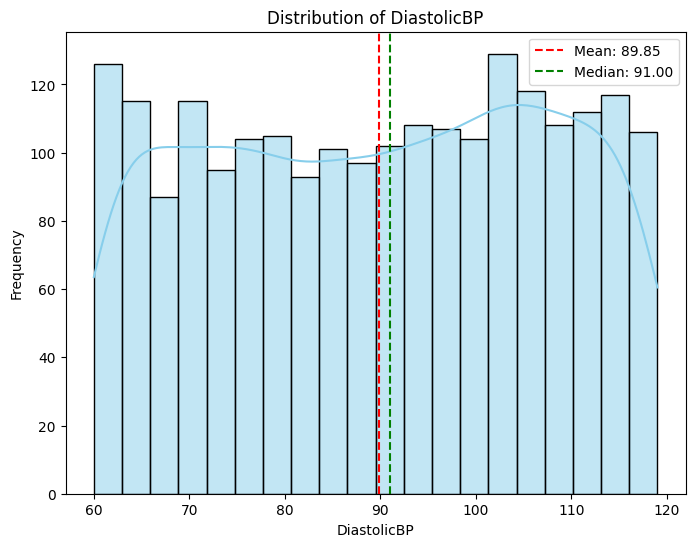


Statistics for CholesterolTotal:
Mean: 225.20
Median: 225.09
Standard Deviation: 42.54
Min: 150.09, Max: 299.99
Range: 149.90
Skewness: -0.02


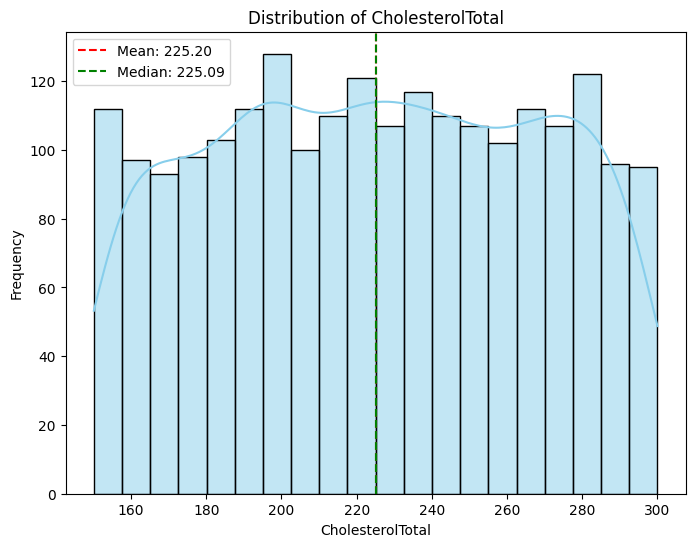


Statistics for CholesterolLDL:
Mean: 124.34
Median: 123.34
Standard Deviation: 43.37
Min: 50.23, Max: 199.97
Range: 149.73
Skewness: 0.04


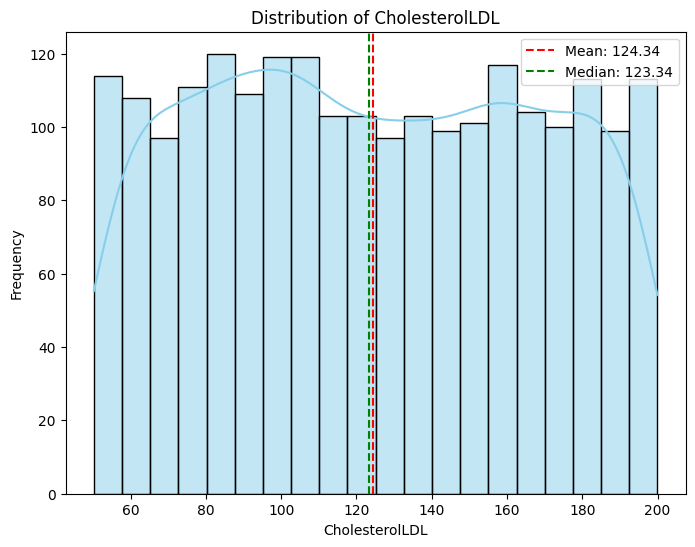


Statistics for CholesterolHDL:
Mean: 59.46
Median: 59.77
Standard Deviation: 23.14
Min: 20.00, Max: 99.98
Range: 79.98
Skewness: 0.04


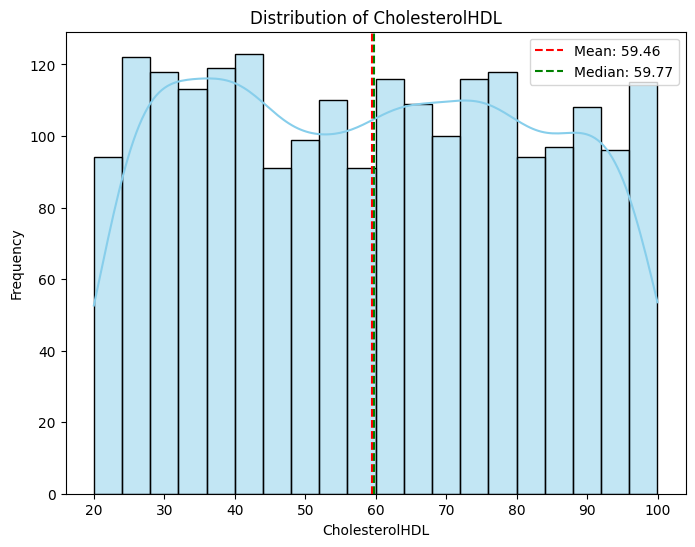


Statistics for CholesterolTriglycerides:
Mean: 228.28
Median: 230.30
Standard Deviation: 101.99
Min: 50.41, Max: 399.94
Range: 349.53
Skewness: -0.03


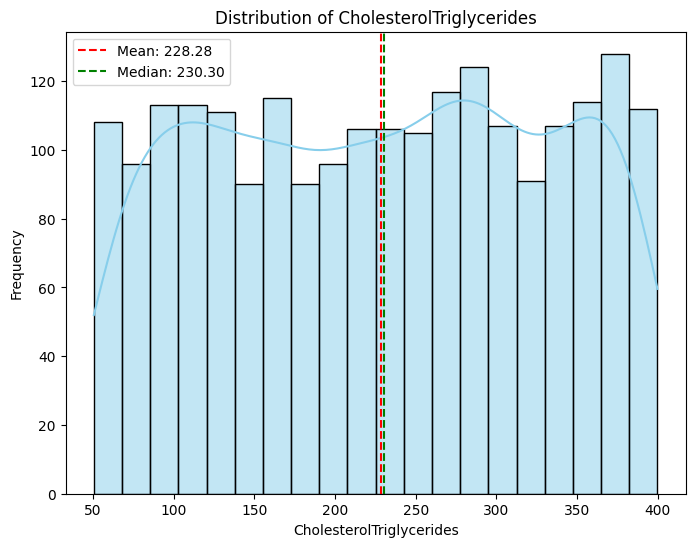

No significant outliers in SystolicBP.
No significant outliers in DiastolicBP.
No significant outliers in CholesterolTotal.
No significant outliers in CholesterolLDL.
No significant outliers in CholesterolHDL.
No significant outliers in CholesterolTriglycerides.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, mode, zscore

# Extract data from the "Clinical_Measurements" class
clinical_measurements_data = class_data["Clinical_Measurements"]

# Function to describe the scales and distribution of the features
def describe_feature_scales_and_distribution(data):
    print("Feature scales and distributions:")
    
    # Loop through the columns
    for col in data.columns:
        # Only process integer columns
        print(f"\nStatistics for {col}:")
        # For continuous variables (only integers now)
        mean = data[col].mean()
        median = data[col].median()
        #modal = mode(data[col].dropna())[0][0]  # Most frequent value (mode)
        std = data[col].std()
        min_val = data[col].min()
        max_val = data[col].max()
        range_val = max_val - min_val
        skewness = skew(data[col].dropna())  # Skewness check
        
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        #print(f"Mode: {modal}")
        print(f"Standard Deviation: {std:.2f}")
        print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
        print(f"Range: {range_val:.2f}")
        print(f"Skewness: {skewness:.2f}")
        
        # Check if the feature needs normalization or standardization
        if std > 1.5 * mean:  # Example condition for needing standardization
            print(f"Warning: {col} has a large standard deviation, consider standardizing.")
        
        # Visualize the distribution with mean, median, and mode lines
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True, color="skyblue", bins=20)
        plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
        plt.axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
        #plt.axvline(modal, color="orange", linestyle="--", label=f"Mode: {modal}")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# Check the features in "Demografic_Details" (excluding non-integer features)
describe_feature_scales_and_distribution(clinical_measurements_data)

# Z-score normalization check (for outliers and identifying features that need normalization)
def check_outliers_and_normalization(data):
    for col in data.columns:
        z_scores = zscore(data[col].dropna())
        outliers = np.where(np.abs(z_scores) > 3)  # Check for outliers (z > 3)
        if len(outliers[0]) > 0:
            print(f"Outliers detected in {col}. Number of outliers: {len(outliers[0])}")
        else:
            print(f"No significant outliers in {col}.")
            
        # If the data is skewed, it might need normalization
        skewness = skew(data[col].dropna())
        if np.abs(skewness) > 1:
            print(f"Warning: {col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")

# Check for outliers and skewness in "Demografic_Details"
check_outliers_and_normalization(clinical_measurements_data)

Feature scales and distributions for Medical History:

Statistics for Confusion:
Mean: 0.21
Median: 0.00
Standard Deviation: 0.40
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.46


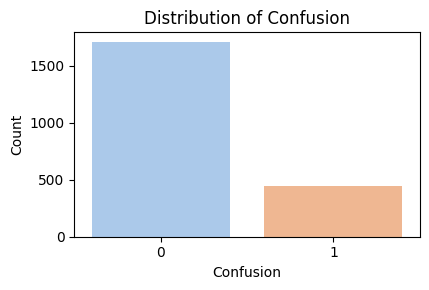


Statistics for Disorientation:
Mean: 0.16
Median: 0.00
Standard Deviation: 0.37
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.87


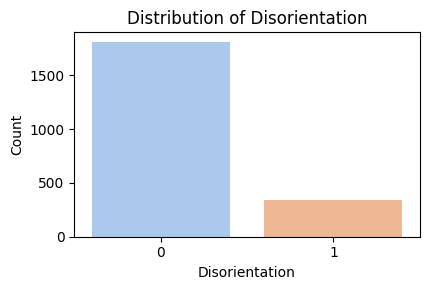


Statistics for PersonalityChanges:
Mean: 0.15
Median: 0.00
Standard Deviation: 0.36
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.95


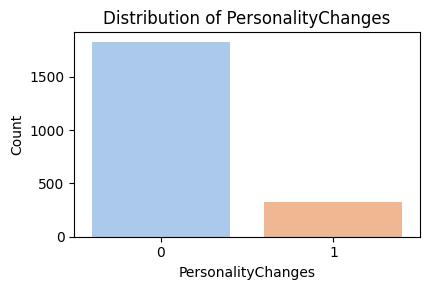


Statistics for DifficultyCompletingTasks:
Mean: 0.16
Median: 0.00
Standard Deviation: 0.37
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.87


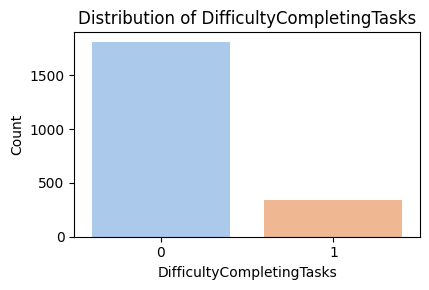


Statistics for Forgetfulness:
Mean: 0.30
Median: 0.00
Standard Deviation: 0.46
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 0.86


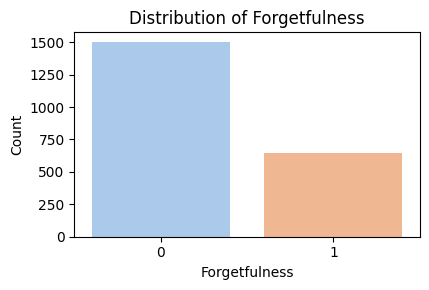

No significant outliers in Confusion.
No significant outliers in Disorientation.
No significant outliers in PersonalityChanges.
No significant outliers in DifficultyCompletingTasks.
No significant outliers in Forgetfulness.


In [23]:
# Extract data from the "Symptoms" class
symptoms_data = class_data["Symptoms"]

# Function to describe the scales and distribution of the features
def describe_feature_scales_and_distribution(data):
    print("Feature scales and distributions for Medical History:")
    
    # Loop through the columns
    for col in data.columns:
        # Only process integer columns or categorical columns (like FamilyHistoryAlzheimers)
        if data[col].dtype == 'int64':  # Only integer columns (binary 0/1 data)
            print(f"\nStatistics for {col}:")
            # For continuous variables (only integers now)
            mean = data[col].mean()
            median = data[col].median()
            std = data[col].std()
            min_val = data[col].min()
            max_val = data[col].max()
            range_val = max_val - min_val
            skewness = skew(data[col].dropna())  # Skewness check
            
            # Print the statistics for the feature
            print(f"Mean: {mean:.2f}")
            print(f"Median: {median:.2f}")
            print(f"Standard Deviation: {std:.2f}")
            print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
            print(f"Range: {range_val:.2f}")
            print(f"Skewness: {skewness:.2f}")
            
            # Create the subplot for the feature
            plt.figure(figsize=(8, 3))
            
            # Create the first subplot for the current column
            plt.subplot(1, 2, 1)
            sns.countplot(data=data, x=col, hue=col, palette="pastel", legend=False)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            
              
            plt.tight_layout()
            plt.show()

# Check the features in "Medical_History"
describe_feature_scales_and_distribution(symptoms_data)

# Z-score normalization check (for outliers and identifying features that need normalization)
def check_outliers_and_normalization(data):
    for col in data.columns:
        if data[col].dtype == 'int64':  # Only for integer columns
            z_scores = zscore(data[col].dropna())
            outliers = np.where(np.abs(z_scores) > 3)  # Check for outliers (z > 3)
            if len(outliers[0]) > 0:
                print(f"Outliers detected in {col}. Number of outliers: {len(outliers[0])}")
            else:
                print(f"No significant outliers in {col}.")
                
            # If the data is skewed, it might need normalization
            skewness = skew(data[col].dropna())
            if np.abs(skewness) > 1:
                print(f"Warning: {col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")

                # Perform standardization if needed
                if col == "Hypertension":  # Example for standardizing Hypertension due to skewness
                    scaler = StandardScaler()
                    data[col] = scaler.fit_transform(data[[col]])
                    print(f"{col} has been standardized.")

# Check for outliers and skewness in "Medical_History"
check_outliers_and_normalization(symptoms_data)


Feature scales and distributions:

Statistics for MMSE:
Mean: 14.76
Median: 14.44
Standard Deviation: 8.61
Min: 0.01, Max: 29.99
Range: 29.99
Skewness: 0.03


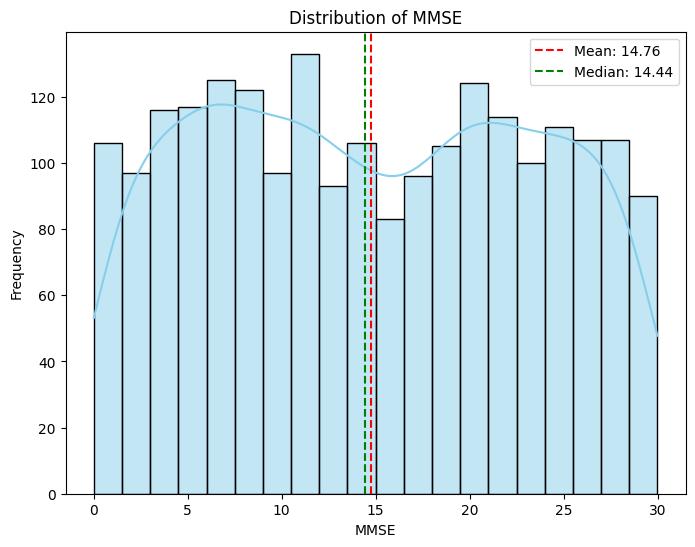


Statistics for FunctionalAssessment:
Mean: 5.08
Median: 5.09
Standard Deviation: 2.89
Min: 0.00, Max: 10.00
Range: 10.00
Skewness: -0.03


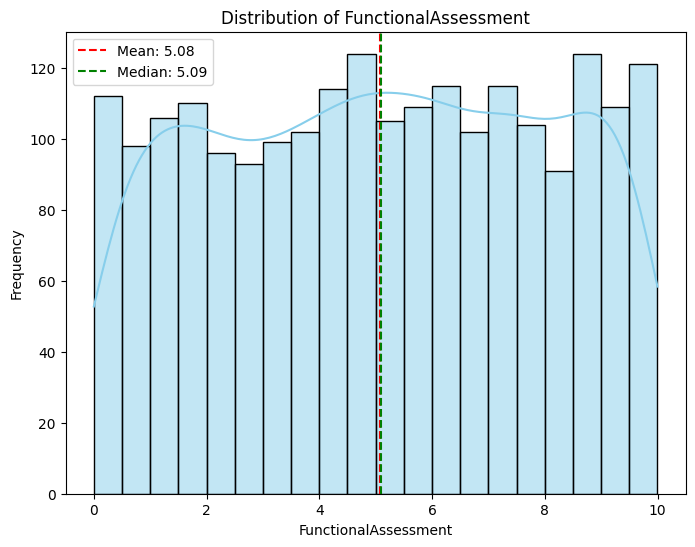


Statistics for MemoryComplaints:
Mean: 0.21
Median: 0.00
Standard Deviation: 0.41
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.44


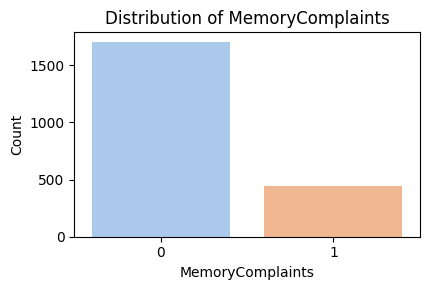


Statistics for BehavioralProblems:
Mean: 0.16
Median: 0.00
Standard Deviation: 0.36
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.89


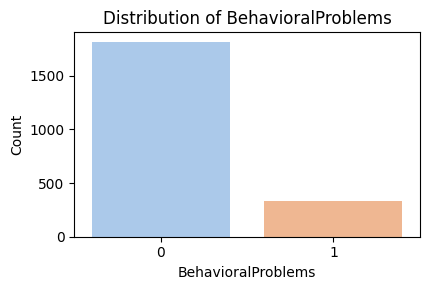


Statistics for ADL:
Mean: 4.98
Median: 5.04
Standard Deviation: 2.95
Min: 0.00, Max: 10.00
Range: 10.00
Skewness: -0.03


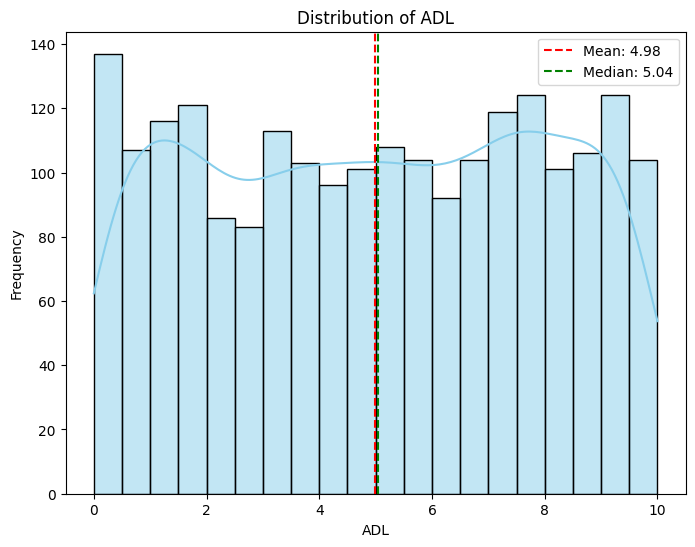

No significant outliers in MMSE.
No significant outliers in FunctionalAssessment.
No significant outliers in MemoryComplaints.
No significant outliers in BehavioralProblems.
No significant outliers in ADL.


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, mode, zscore

# Extract data from the "Congnitive_and_Functional_Assements" class
cognitive_data = class_data["Congnitive_and_Functional_Assements"]

# Function to describe the scales and distribution of the features
def describe_feature_scales_and_distribution(data):
    print("Feature scales and distributions:")
    
    # Loop through the columns
    for col in data.columns:
        print(f"\nStatistics for {col}:")
        # For continuous variables (only integers now)
        mean = data[col].mean()
        median = data[col].median()
        #modal = mode(data[col].dropna())[0][0]  # Most frequent value (mode)
        std = data[col].std()
        min_val = data[col].min()
        max_val = data[col].max()
        range_val = max_val - min_val
        skewness = skew(data[col].dropna())  # Skewness check
        
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Standard Deviation: {std:.2f}")
        print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
        print(f"Range: {range_val:.2f}")
        print(f"Skewness: {skewness:.2f}")

        if col == "BehavioralProblems" or col == "MemoryComplaints":
            # Create the subplot for the feature
            plt.figure(figsize=(8, 3))
            
            # Create the first subplot for the current column
            plt.subplot(1, 2, 1)
            sns.countplot(data=data, x=col, hue=col, palette="pastel", legend=False)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            
            
            plt.tight_layout()
            plt.show()
        else:
            # Check if the feature needs normalization or standardization
            if std > 1.5 * mean:  # Example condition for needing standardization
                print(f"Warning: {col} has a large standard deviation, consider standardizing.")
            
            # Visualize the distribution with mean, median, and mode lines
            plt.figure(figsize=(8, 6))
            sns.histplot(data[col], kde=True, color="skyblue", bins=20)
            plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
            plt.axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
            #plt.axvline(modal, color="orange", linestyle="--", label=f"Mode: {modal}")
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.legend()
            plt.show()

# Check the features in "Demografic_Details" (excluding non-integer features)
describe_feature_scales_and_distribution(cognitive_data)

# Z-score normalization check (for outliers and identifying features that need normalization)
def check_outliers_and_normalization(data):
    for col in data.columns:
        z_scores = zscore(data[col].dropna())
        outliers = np.where(np.abs(z_scores) > 3)  # Check for outliers (z > 3)
        if len(outliers[0]) > 0:
            print(f"Outliers detected in {col}. Number of outliers: {len(outliers[0])}")
        else:
            print(f"No significant outliers in {col}.")
            
        # If the data is skewed, it might need normalization
        skewness = skew(data[col].dropna())
        if np.abs(skewness) > 1:
            print(f"Warning: {col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")

# Check for outliers and skewness in "Demografic_Details"
check_outliers_and_normalization(cognitive_data)


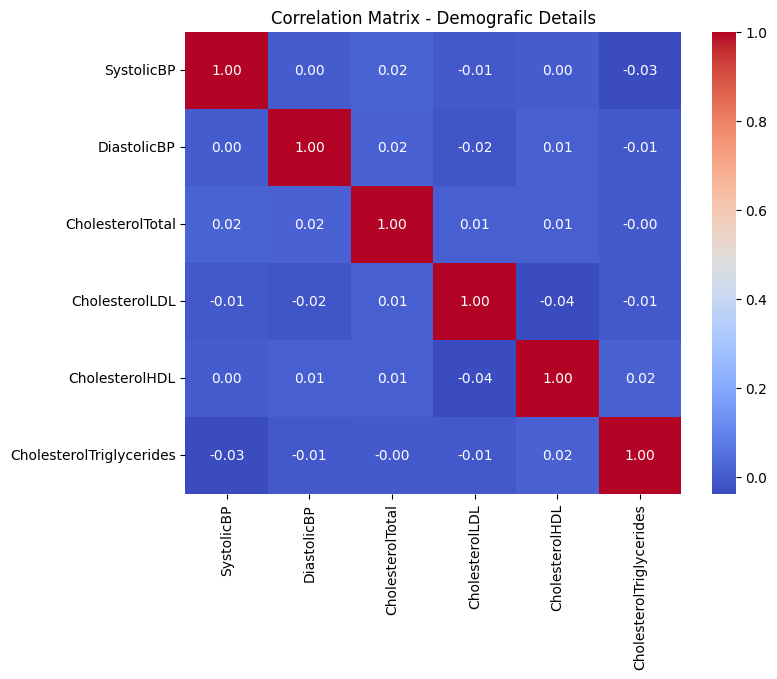


Chi-square test results (for categorical variables):
Chi-square test between SystolicBP and DiastolicBP: p-value = 0.1175
Chi-square test between SystolicBP and CholesterolTotal: p-value = 0.4424
Chi-square test between SystolicBP and CholesterolLDL: p-value = 0.4424
Chi-square test between SystolicBP and CholesterolHDL: p-value = 0.4424
Chi-square test between SystolicBP and CholesterolTriglycerides: p-value = 0.4424
Chi-square test between DiastolicBP and SystolicBP: p-value = 0.1175
Chi-square test between DiastolicBP and CholesterolTotal: p-value = 0.4528
Chi-square test between DiastolicBP and CholesterolLDL: p-value = 0.4528
Chi-square test between DiastolicBP and CholesterolHDL: p-value = 0.4528
Chi-square test between DiastolicBP and CholesterolTriglycerides: p-value = 0.4528
Chi-square test between CholesterolTotal and SystolicBP: p-value = 0.4424
Chi-square test between CholesterolTotal and DiastolicBP: p-value = 0.4528
Chi-square test between CholesterolTotal and Cholestero

In [35]:
from sklearn import preprocessing 
from scipy.stats import chi2_contingency

clinical_measurements_data = class_data["Clinical_Measurements"]

# Funkcja do kodowania zmiennych kategorycznych
def encode_categorical(data):
    le = preprocessing.LabelEncoder()
    encoded_data = data.copy()
    
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':  # Only encode categorical columns
            encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data

# 1. Przygotowanie danych (kodowanie zmiennych kategorycznych)
encoded_data = encode_categorical(clinical_measurements_data)

# 2. Obliczenie korelacji dla zmiennych numerycznych (Pearson)
correlation_matrix = encoded_data.corr(method='pearson')

# 3. Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix - Demografic Details")
plt.show()

# 4. Test chi-kwadrat dla zmiennych kategorycznych (Gender, Ethnicity, EducationLevel)
def chi_square_test(data):
    print("\nChi-square test results (for categorical variables):")
    
    # Wykonaj test chi-kwadrat dla par zmiennych kategorycznych
    categorical_cols = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                # Stwórz tabelę kontyngencji dla dwóch zmiennych kategorycznych
                contingency_table = pd.crosstab(data[col1], data[col2])
                # Test chi-kwadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}: p-value = {p:.4f}")

# Przeprowadź test chi-kwadrat
chi_square_test(clinical_measurements_data)


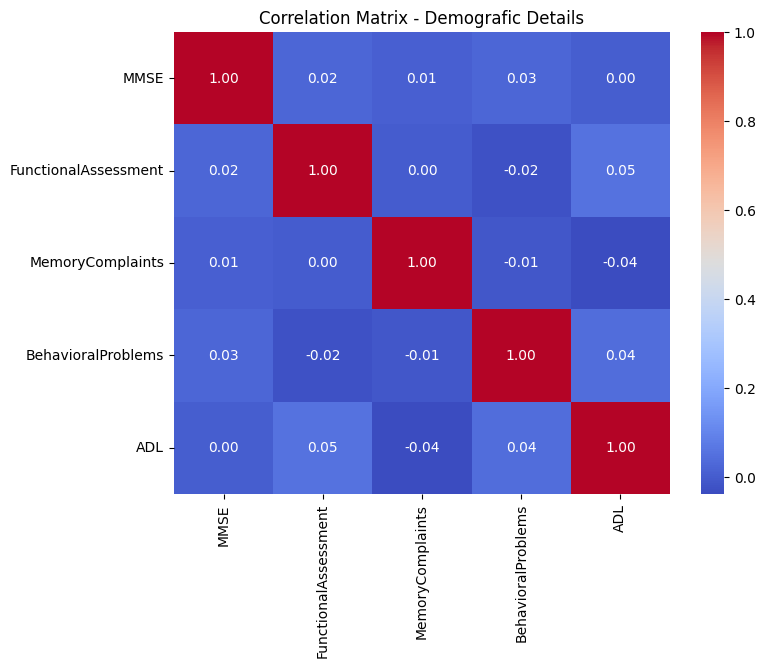


Chi-square test results (for categorical variables):
Chi-square test between MMSE and FunctionalAssessment: p-value = 0.2397
Chi-square test between MMSE and MemoryComplaints: p-value = 0.4899
Chi-square test between MMSE and BehavioralProblems: p-value = 0.4899
Chi-square test between MMSE and ADL: p-value = 0.2397
Chi-square test between FunctionalAssessment and MMSE: p-value = 0.2397
Chi-square test between FunctionalAssessment and MemoryComplaints: p-value = 0.4899
Chi-square test between FunctionalAssessment and BehavioralProblems: p-value = 0.4899
Chi-square test between FunctionalAssessment and ADL: p-value = 0.2397
Chi-square test between MemoryComplaints and MMSE: p-value = 0.4899
Chi-square test between MemoryComplaints and FunctionalAssessment: p-value = 0.4899
Chi-square test between MemoryComplaints and BehavioralProblems: p-value = 0.7042
Chi-square test between MemoryComplaints and ADL: p-value = 0.4899
Chi-square test between BehavioralProblems and MMSE: p-value = 0.48

In [36]:
from sklearn import preprocessing 
from scipy.stats import chi2_contingency

cognitive_data = class_data["Congnitive_and_Functional_Assements"]

# Funkcja do kodowania zmiennych kategorycznych
def encode_categorical(data):
    le = preprocessing.LabelEncoder()
    encoded_data = data.copy()
    
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':  # Only encode categorical columns
            encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data

# 1. Przygotowanie danych (kodowanie zmiennych kategorycznych)
encoded_data = encode_categorical(cognitive_data)

# 2. Obliczenie korelacji dla zmiennych numerycznych (Pearson)
correlation_matrix = encoded_data.corr(method='pearson')

# 3. Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix - Demografic Details")
plt.show()

# 4. Test chi-kwadrat dla zmiennych kategorycznych (Gender, Ethnicity, EducationLevel)
def chi_square_test(data):
    print("\nChi-square test results (for categorical variables):")
    
    # Wykonaj test chi-kwadrat dla par zmiennych kategorycznych
    categorical_cols = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                # Stwórz tabelę kontyngencji dla dwóch zmiennych kategorycznych
                contingency_table = pd.crosstab(data[col1], data[col2])
                # Test chi-kwadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}: p-value = {p:.4f}")

# Przeprowadź test chi-kwadrat
chi_square_test(cognitive_data)


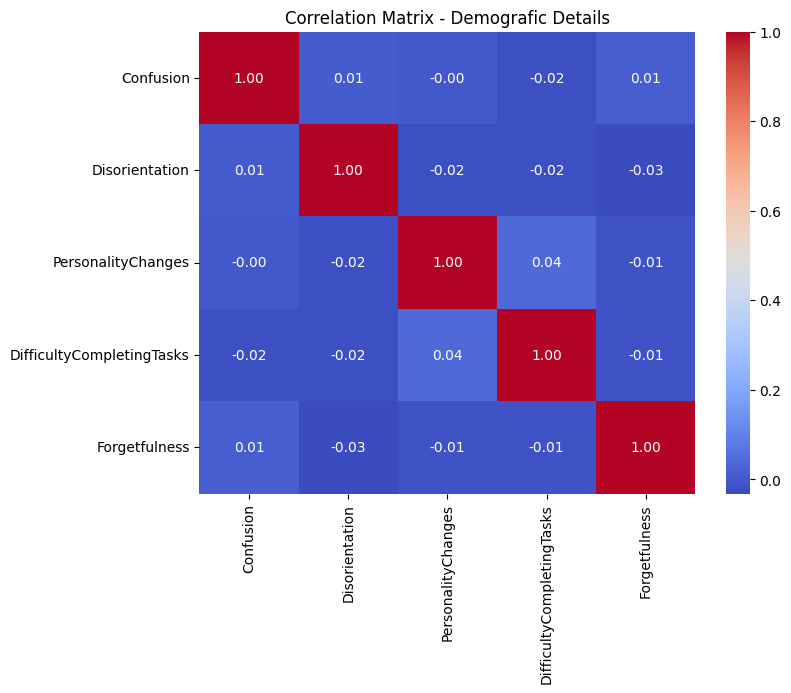


Chi-square test results (for categorical variables):
Chi-square test between Confusion and Disorientation: p-value = 0.8003
Chi-square test between Confusion and PersonalityChanges: p-value = 1.0000
Chi-square test between Confusion and DifficultyCompletingTasks: p-value = 0.3437
Chi-square test between Confusion and Forgetfulness: p-value = 0.6818
Chi-square test between Disorientation and Confusion: p-value = 0.8003
Chi-square test between Disorientation and PersonalityChanges: p-value = 0.3413
Chi-square test between Disorientation and DifficultyCompletingTasks: p-value = 0.3779
Chi-square test between Disorientation and Forgetfulness: p-value = 0.1557
Chi-square test between PersonalityChanges and Confusion: p-value = 1.0000
Chi-square test between PersonalityChanges and Disorientation: p-value = 0.3413
Chi-square test between PersonalityChanges and DifficultyCompletingTasks: p-value = 0.0960
Chi-square test between PersonalityChanges and Forgetfulness: p-value = 0.5814
Chi-square

In [37]:
from sklearn import preprocessing 
from scipy.stats import chi2_contingency

symptoms_data = class_data["Symptoms"]

# Funkcja do kodowania zmiennych kategorycznych
def encode_categorical(data):
    le = preprocessing.LabelEncoder()
    encoded_data = data.copy()
    
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':  # Only encode categorical columns
            encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data

# 1. Przygotowanie danych (kodowanie zmiennych kategorycznych)
encoded_data = encode_categorical(symptoms_data)

# 2. Obliczenie korelacji dla zmiennych numerycznych (Pearson)
correlation_matrix = encoded_data.corr(method='pearson')

# 3. Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix - Demografic Details")
plt.show()

# 4. Test chi-kwadrat dla zmiennych kategorycznych (Gender, Ethnicity, EducationLevel)
def chi_square_test(data):
    print("\nChi-square test results (for categorical variables):")
    
    # Wykonaj test chi-kwadrat dla par zmiennych kategorycznych
    categorical_cols = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                # Stwórz tabelę kontyngencji dla dwóch zmiennych kategorycznych
                contingency_table = pd.crosstab(data[col1], data[col2])
                # Test chi-kwadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}: p-value = {p:.4f}")

# Przeprowadź test chi-kwadrat
chi_square_test(symptoms_data)
